In [2]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np



In [29]:
pred_df = pd.read_csv('../model_outputs/phonexfs/outputs.csv', header=None)

In [30]:
pred_df

,0
0,1.073696
1,1.976131
2,0.565972
3,0.947371
4,1.804992
...,...
7629,0.429344
7630,0.173168
7631,0.186775
7632,0.162468


In [6]:
pos_df = pd.read_csv('../splits/positives/mouse_liver_VAL.narrowPeak', header=None, delim_whitespace=True)

In [7]:
pos_df

,0,1,2,3,4
0,chr8,3215633,3216133,peak19386,2.392057
1,chr8,3227452,3227952,peak19387,1.898547
2,chr8,3256127,3256627,peak19389,1.596960
3,chr8,3256437,3256937,peak19388,1.883330
4,chr8,3313760,3314260,peak19390,1.870926
...,...,...,...,...,...
1225,chr9,23453264,23453764,peak20611,3.438757
1226,chr9,23529974,23530474,peak20612,2.154097
1227,chr9,23580977,23581477,peak20613,2.925209
1228,chr9,23581228,23581728,peak20614,2.065821


In [8]:
neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True)

In [9]:
neg_df

,0,1,2,3,4
0,chr8,3219236,3219736,peak3274,0
1,chr8,3728871,3729371,peak3276,0
2,chr8,4851294,4851794,peak78519,0
3,chr8,4893811,4894311,peak12239,0
4,chr8,4955619,4956119,peak6833,0
...,...,...,...,...,...
2582,chr9,122701704,122702204,peak4687,0
2583,chr9,122755883,122756383,peak20370,0
2584,chr9,123187491,123187991,peak20675,0
2585,chr9,123937871,123938371,peak4695,0


In [18]:
pdf = pos_df.iloc[:,4]

In [16]:
doubled_pdf = pd.concat([pdf, pdf]).sort_index(kind='mergesort').reset_index(drop=True)

In [17]:
doubled_pdf

0       2.392057
1       2.392057
2       1.898547
3       1.898547
4       1.596960
          ...   
2455    2.925209
2456    2.065821
2457    2.065821
2458    1.911395
2459    1.911395
Name: 4, Length: 2460, dtype: float64

In [19]:
pdf

0       2.392057
1       1.898547
2       1.596960
3       1.883330
4       1.870926
          ...   
1225    3.438757
1226    2.154097
1227    2.925209
1228    2.065821
1229    1.911395
Name: 4, Length: 1230, dtype: float64

In [20]:
doubled_ndf = pd.concat([neg_df.iloc[:,4], neg_df.iloc[:,4]]).sort_index(kind='mergesort').reset_index(drop=True)

In [21]:
doubled_ndf

0       0
1       0
2       0
3       0
4       0
       ..
5169    0
5170    0
5171    0
5172    0
5173    0
Name: 4, Length: 5174, dtype: int64

In [24]:
doubled_df = pd.concat([doubled_pdf, doubled_ndf])

In [25]:
doubled_df

0       2.392057
1       2.392057
2       1.898547
3       1.898547
4       1.596960
          ...   
5169    0.000000
5170    0.000000
5171    0.000000
5172    0.000000
5173    0.000000
Name: 4, Length: 7634, dtype: float64

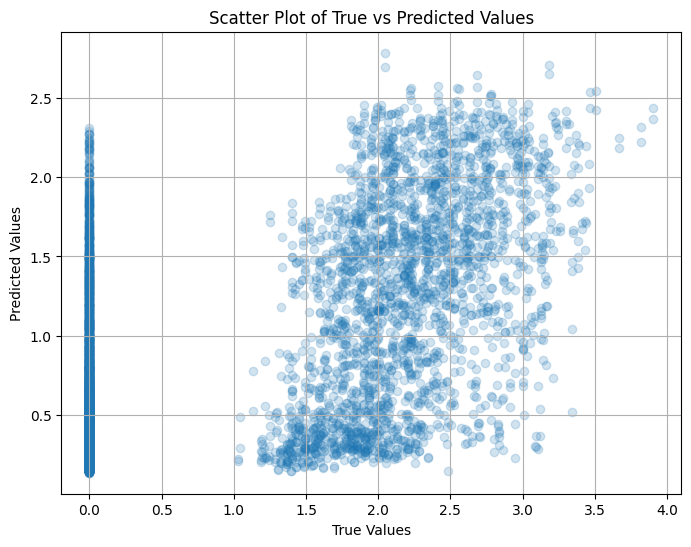

In [46]:
x = doubled_df.squeeze()  # True values as x-axis
y = pred_df.squeeze()  # Predicted values as y-axis

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.grid(True)
plt.show()

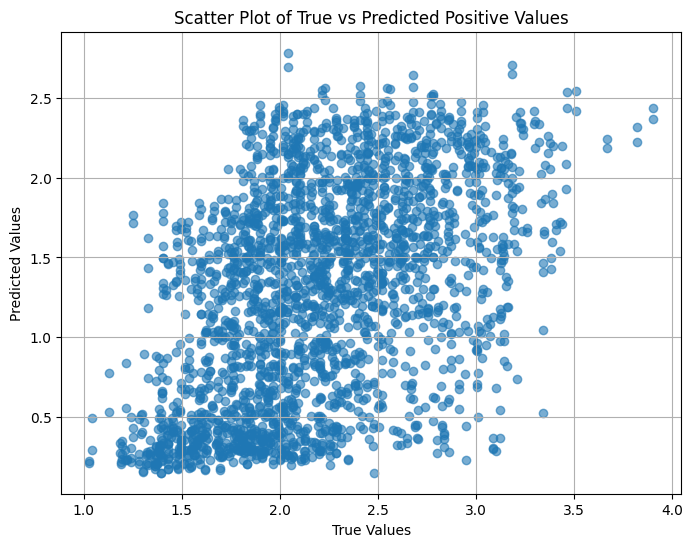

In [28]:
x = doubled_df.head(2460).squeeze()  # True values as x-axis
y = pred_df.head(2460).squeeze()  # Predicted values as y-axis

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Positive Values')
plt.grid(True)
plt.show()

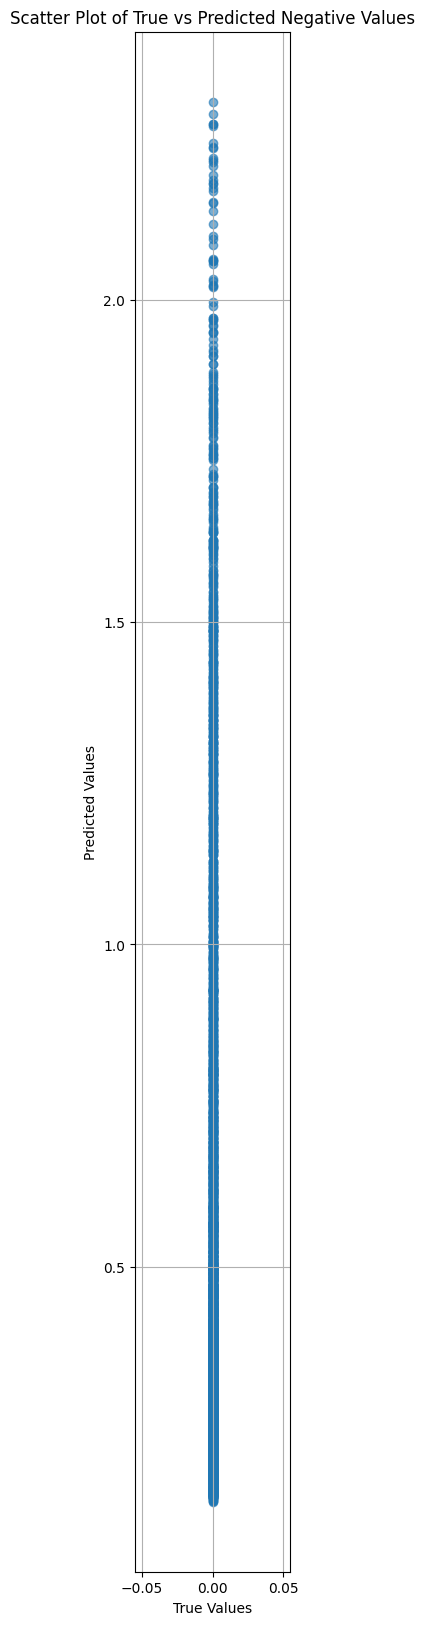

In [30]:
x = doubled_df.tail(5174).squeeze()  # True values as x-axis
y = pred_df.tail(5174).squeeze()  # Predicted values as y-axis

# Create the scatter plot
plt.figure(figsize=(2, 20))
plt.scatter(x, y, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Negative Values')
plt.grid(True)
plt.show()

In [32]:
x = doubled_df.squeeze()
y = pred_df.squeeze()

# Calculate Pearson correlation coefficient
pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

# Calculate Spearman correlation coefficient
spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)

Pearson correlation coefficient: 0.6542, p-value: 0


In [33]:
spearman_corr, spearman_p_value

(0.5971969055401256, 0.0)

In [34]:
pearson_corr, pearson_p_value

(0.6541578137547343, 0.0)

In [2]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

pred_df = pd.read_csv('../model_outputs/s4dq5zex/outputs_VAL.csv', header=None)
pos_df = pd.read_csv('../splits/positives/mouse_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
pos_len = len(pos_df)
doubled_pdf = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
neg_len = len(neg_df)
doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_df = pd.concat([doubled_pdf, doubled_ndf])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4],  color='#015088', linestyle='--', label='y = x')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_df, doubled_df, 'all')
    scatter(pred_df.head(pos_len*2), doubled_pdf, 'Positive')
    # scatter(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def ploth():
    plt.hist(pred_df.tail(neg_len*2), bins=50,  color='#015088')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel('Predicted Values')
    plt.ylabel('Count')
    plt.title(f'Histogram of Negative Predicted Values')
    plt.show()
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_df, 'all')
    correlations(pred_df.head(pos_len*2), doubled_pdf, 'positive')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')


In [4]:
correlate()

Pearson correlation coefficient for all: 0.6693, p-value: 0
Spearman correlation coefficient for all: 0.6120, p-value: 0
Pearson correlation coefficient for positive: 0.4948, p-value: 4.279e-152
Spearman correlation coefficient for positive: 0.5110, p-value: 1.006e-163


In [3]:
correlate()

Pearson correlation coefficient for all: 0.6693, p-value: 0
Spearman correlation coefficient for all: 0.6120, p-value: 0
Pearson correlation coefficient for positive: 0.4948, p-value: 4.279e-152
Spearman correlation coefficient for positive: 0.5110, p-value: 1.006e-163


In [9]:
correlate()

Pearson correlation coefficient for all: 0.6542, p-value: 0
Spearman correlation coefficient for all: 0.5972, p-value: 0
Pearson correlation coefficient for positive: 0.4823, p-value: 1.686e-143
Spearman correlation coefficient for positive: 0.4869, p-value: 1.141e-146


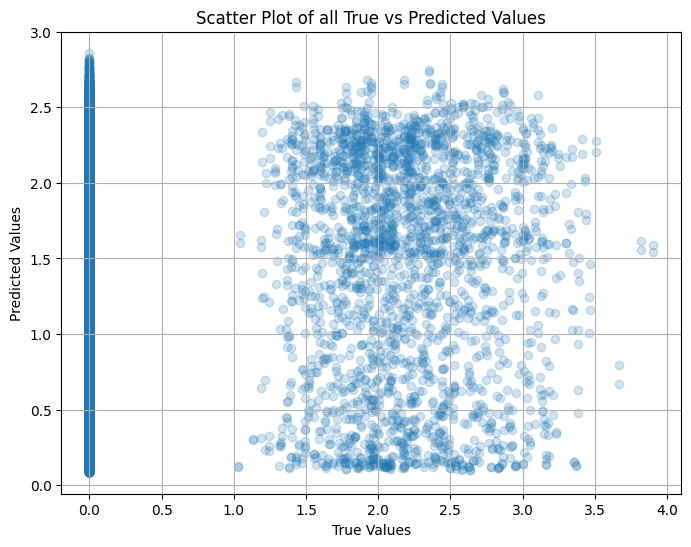

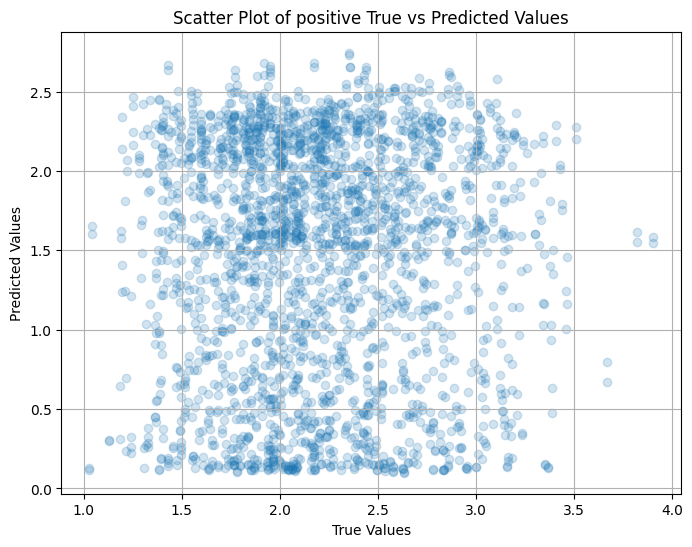

ValueError: x and y must be the same size

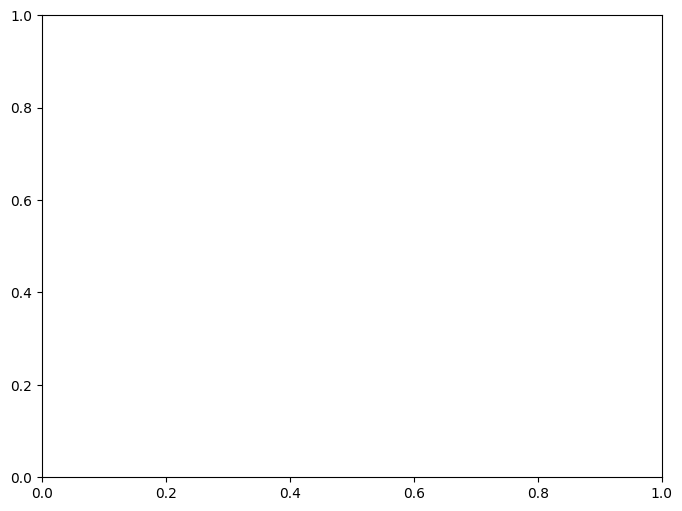

In [9]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import argparse
import sys

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter(pred_df, doubled_df, doubled_ndf):
    scatter(pred_df, doubled_df, 'all')
    scatter(pred_df.head(pos_len*2), doubled_pdf, 'positive')
    scatter(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def ploth(pred_df):
    plt.hist(pred_df.tail(neg_len*2), bins=50)
    plt.xlabel('Predicted Values')
    plt.ylabel('Count')
    plt.title(f'Histogram of Negative Predicted Values')
    plt.show()
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate(pred_df, doubled_df, doubled_ndf):
    correlations(pred_df, doubled_df, 'all')
    correlations(pred_df.head(pos_len*2), doubled_pdf, 'positive')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def parse():
    parser = argparse.ArgumentParser()
    
    parser.add_argument("--model_outputs", type=str, required=True, help="Full path to the model outputs ie. /model_outputs/[modelname]/outputs.csv")
    parser.add_argument("--pos", type=str, required=True, help="Full path to the true positive values")

    # flags
    parser.add_argument("-scatter", action="store_true", help="Saves scatter plots")
    parser.add_argument("-hist", action="store_true", help="Saves histogram plots")
    parser.add_argument("-correlate", action="store_true", help="Prints Pearson and Spearman correlations")
    
    return parser.parse_args()


sys.argv = ['correlations.ipynb', '--model_outputs', '../model_outputs/s4dq5zex/outputs.csv', '--pos', '../splits/positives/mouse_liver_VAL.narrowPeak', '-scatter', '-hist', '-correlate']

if __name__ == "__main__":
    args = parse()
    
    pred_df = pd.read_csv(args.model_outputs, header=None)
    pos_df = pd.read_csv(args.pos, header=None, delim_whitespace=True).iloc[:,4]
    pos_len = len(pos_df)
    doubled_pdf = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_neg_len = len(pred_df) - 2*pos_len
    doubled_ndf = pd.DataFrame(np.zeros((doubled_neg_len, 1)))
    doubled_df = pd.concat([doubled_pdf, doubled_ndf])  

    if args.scatter:
        plotscatter(pred_df, doubled_df, doubled_ndf)
    if args.hist:
        ploth(pred_df)
    if args.correlate:
        correlate(pred_df, doubled_df, doubled_ndf)


In [ ]:
printf('python scripts/get_activations.py -model /home/azstephe/repos/cnn_pipeline/wandb/{runname}/files/model-best.h5 -in_files /home/azstephe/regression_liver/data/splits/positives/mouse_liver_TRAIN.narrowPeak /home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_TRAIN_500bp.bed -in_genomes /projects/pfenninggroup/machineLearningForComputationalBiology/halLiftover_chains/data/raw_data/fasta/Mus_musculus.fa /projects/pfenninggroup/machineLearningForComputationalBiology/halLiftover_chains/data/raw_data/fasta/Mus_musculus.fa -out_file /home/azstephe/regression_liver/data/model_outputs/{modelname} --write_csv')

In [9]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

pred_df = pd.read_csv('../model_outputs/s4dq5zex/outputs_TRAIN.csv', header=None)
pos_df = pd.read_csv('../splits/positives/mouse_liver_TRAIN.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
pos_len = len(pos_df)
doubled_pdf = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_TRAIN_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
neg_len = len(neg_df)
doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_df = pd.concat([doubled_pdf, doubled_ndf])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4],  color='#015088', linestyle='--', label='y = x')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.05)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_df, doubled_df, 'all')
    scatter(pred_df.head(pos_len*2), doubled_pdf, 'positive')
    # scatter(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def ploth():
    plt.hist(pred_df.tail(neg_len*2), bins=50, color='#015088')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel('Predicted Values')
    plt.ylabel('Count')
    plt.title(f'Histogram of Negative Predicted Values')
    plt.show()
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_df, 'all')
    correlations(pred_df.head(pos_len*2), doubled_pdf, 'positive')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')


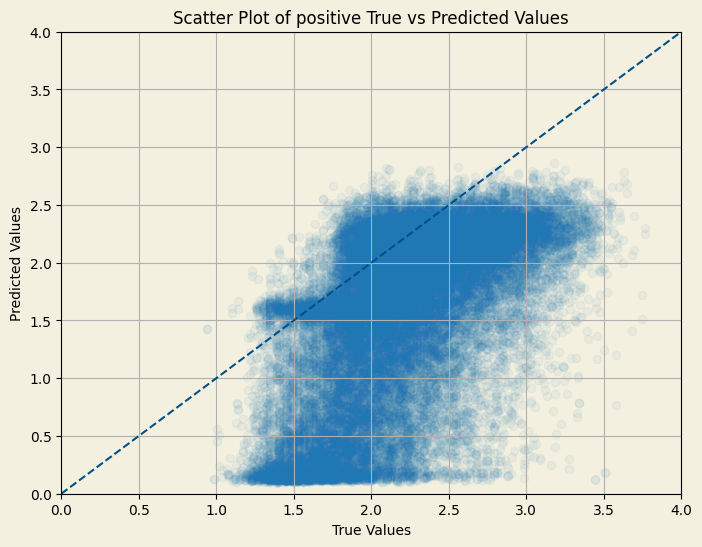

In [10]:
plotscatter()

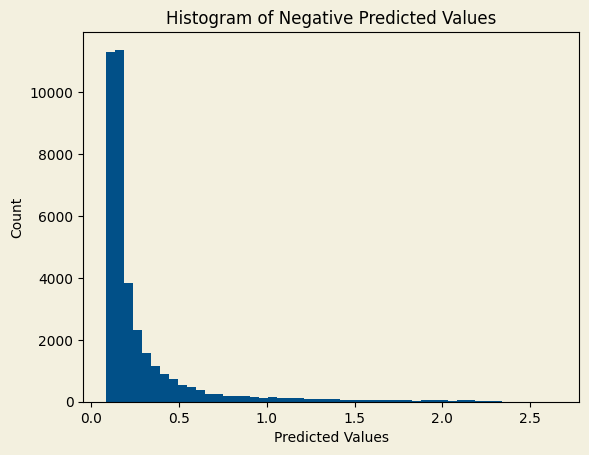

In [11]:
ploth()

In [19]:
correlate()

Pearson correlation coefficient for all: 0.6693, p-value: 0
Spearman correlation coefficient for all: 0.6120, p-value: 0
Pearson correlation coefficient for positive: 0.4948, p-value: 4.279e-152
Spearman correlation coefficient for positive: 0.5110, p-value: 1.006e-163


In [33]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/1c8n0ubm/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/old_val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/old_val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'val1')
    # scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'true Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of true Values')
    plt.show()

def ploth():
    # histogram(pred_val1_df, 'val1')
    # histogram(val2_df, 'val2')
    histogram(val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val1_df, doubled_val1_df, 'val1')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    median1 = neg.median()
    median2 = pos.median()
    print(f"Median of data1: {median1}")
    print(f"Median of data2: {median2}")
    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)


In [34]:
# plotscatter()
# ploth()
correlate()
# wilcox()

Pearson correlation coefficient for all: 0.4884, p-value: 0
Spearman correlation coefficient for all: 0.3657, p-value: 0
Pearson correlation coefficient for val1: nan, p-value: nan
Spearman correlation coefficient for val1: nan, p-value: nan
Pearson correlation coefficient for val2: 0.4475, p-value: 2.597e-20
Spearman correlation coefficient for val2: 0.4421, p-value: 8.332e-20
Pearson correlation coefficient for val3: 0.3310, p-value: 3.253e-28
Spearman correlation coefficient for val3: 0.3315, p-value: 2.702e-28


/home/azstephe/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/azstephe/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [8]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

pred_df = pd.read_csv('../model_outputs/7hmyaldm/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1, doubled_val2, doubled_val3])

    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val1_df, doubled_val1_df, 'val1')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')


In [9]:
correlate()

Pearson correlation coefficient for all: 0.3764, p-value: 4.999e-55
Spearman correlation coefficient for all: 0.3873, p-value: 2.112e-58
Pearson correlation coefficient for val1: 0.0141, p-value: 0.8565
Spearman correlation coefficient for val1: 0.0501, p-value: 0.5192
Pearson correlation coefficient for val2: 0.4335, p-value: 5.025e-19
Spearman correlation coefficient for val2: 0.4192, p-value: 8.99e-18
Pearson correlation coefficient for val3: 0.3278, p-value: 1.135e-27
Spearman correlation coefficient for val3: 0.3404, p-value: 7.735e-30


In [33]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

pred_df = pd.read_csv('../model_outputs/r0p9r0em/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

pred_val1_df = pd.read_csv('../model_outputs/r0p9r0em/activations_macaque_VAL1.csv', header=None)

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

#pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'Predicted Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of Negative Predicted Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    # correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val1_df, doubled_val1_df, 'val1')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')


In [34]:
#correlate()
ploth()

Pearson correlation coefficient for val1: nan, p-value: nan
Spearman correlation coefficient for val1: nan, p-value: nan
Pearson correlation coefficient for val2: 0.4469, p-value: 2.992e-20
Spearman correlation coefficient for val2: 0.4358, p-value: 3.154e-19
Pearson correlation coefficient for val3: -0.0581, p-value: 0.05989
Spearman correlation coefficient for val3: -0.0618, p-value: 0.04556


/home/azstephe/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/azstephe/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [16]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/r0p9r0em/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/old_val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/old_val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'val1')
    scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlim(0, 4)
    plt.xlabel(f'true Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of true Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    histogram(val2_df, 'val2')
    histogram(val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



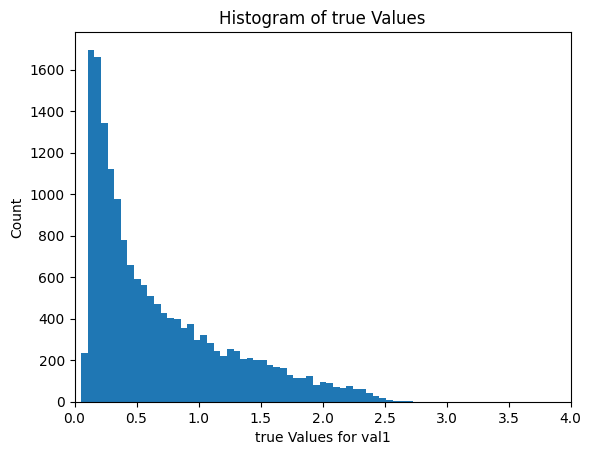

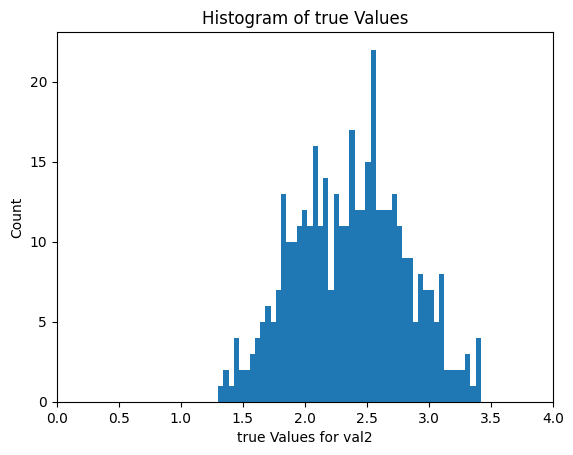

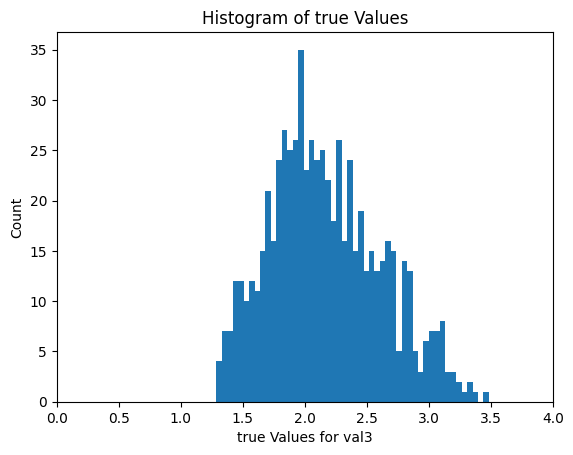

In [17]:
ploth()
# plotscatter()
# correlate()
# wilcox()

In [18]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/7hmyaldm/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'val1')
    scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'Predicted Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of Predicted Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    histogram(pred_val2_df, 'val2')
    histogram(pred_val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



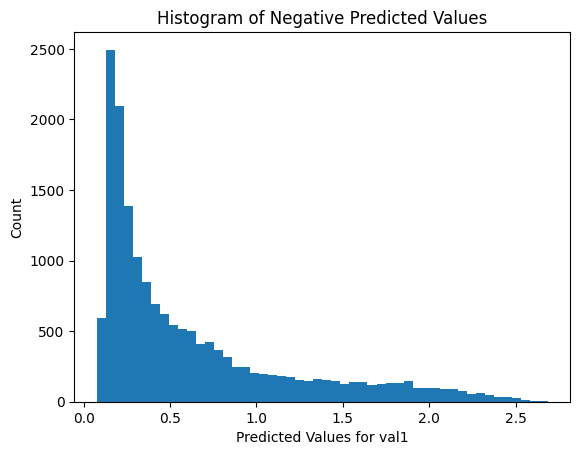

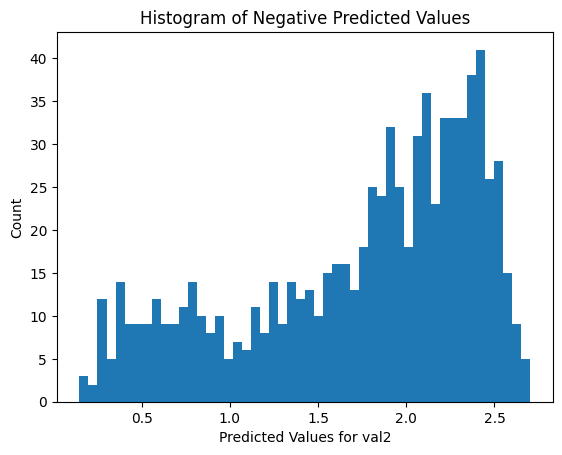

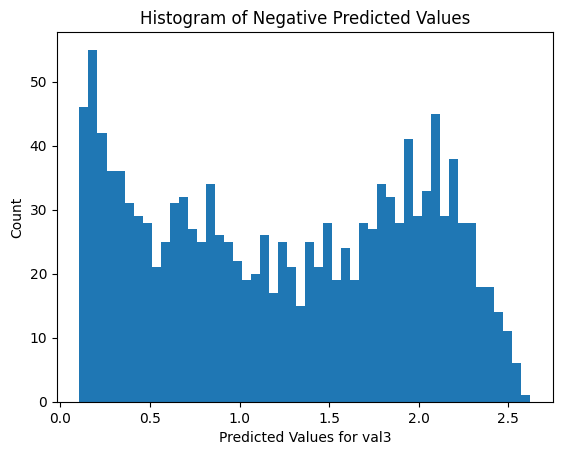

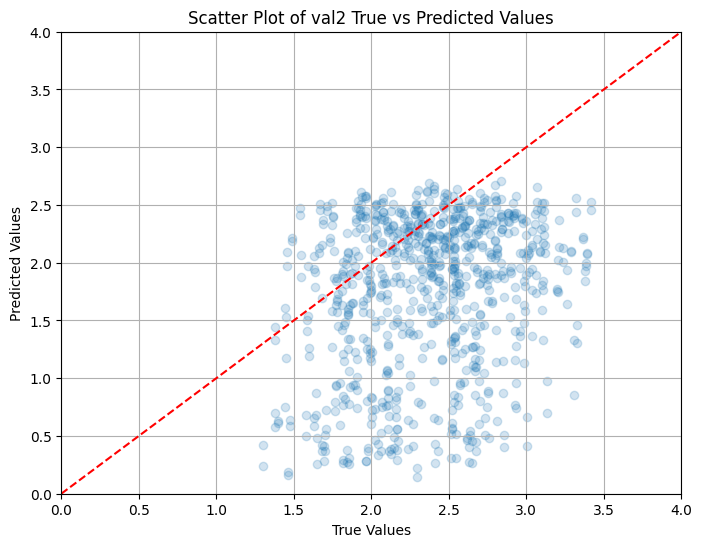

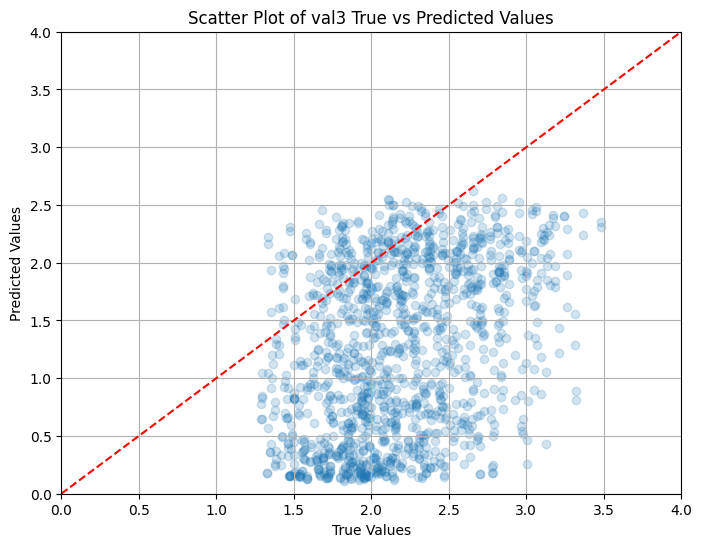

Pearson correlation coefficient for all: 0.4163, p-value: 0
Spearman correlation coefficient for all: 0.3368, p-value: 0
Pearson correlation coefficient for val2: 0.2329, p-value: 2.055e-11
Spearman correlation coefficient for val2: 0.2003, p-value: 9.313e-09
Pearson correlation coefficient for val3: 0.3372, p-value: 6.14e-37
Spearman correlation coefficient for val3: 0.3334, p-value: 4.196e-36
Wilcoxon Rank-Sum Test:
Test Statistic: [-37.36204945]
P-value: [1.61594845e-305]
There is a significant difference between the two distributions (reject null hypothesis).
Wilcoxon Rank-Sum Test:
Test Statistic: [-30.59274321]
P-value: [1.52860538e-205]
There is a significant difference between the two distributions (reject null hypothesis).


In [13]:
ploth()
plotscatter()
correlate()
wilcox()

In [43]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/1c8n0ubm/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'val1')
    # scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50, color='#015088')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'Predicted Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of Negative Predicted Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    # histogram(pred_val2_df, 'val2')
    # histogram(pred_val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



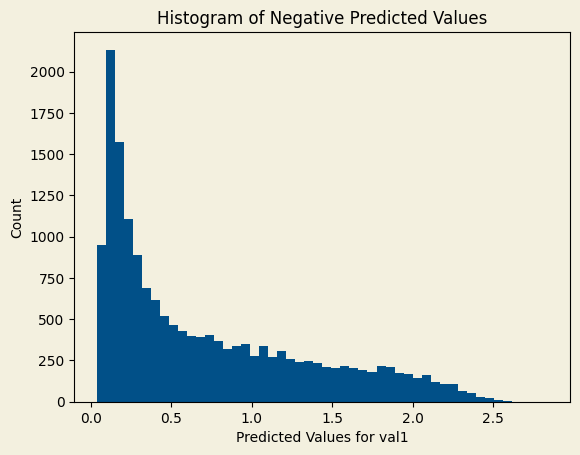

Pearson correlation coefficient for all: 0.3741, p-value: 0
Spearman correlation coefficient for all: 0.3181, p-value: 0
Pearson correlation coefficient for val2: 0.2516, p-value: 3.909e-13
Spearman correlation coefficient for val2: 0.2215, p-value: 1.943e-10
Pearson correlation coefficient for val3: 0.3359, p-value: 1.184e-36
Spearman correlation coefficient for val3: 0.3413, p-value: 7.623e-38


In [45]:
ploth()
# plotscatter()
correlate()
# wilcox()

In [51]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('../model_outputs/7hmyaldm/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('../splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('../splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('../splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'val1')
    scatter(pred_val2_df, doubled_val2_df, 'val2')
    # scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50, color='#015088')
    plt.gcf().set_facecolor('#f3f0dfff')
    plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'Predicted Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of Negative Predicted Values')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'val1')
    # histogram(pred_val2_df, 'val2')
    # histogram(pred_val3_df, 'val3')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



In [55]:
wilcox()

Wilcoxon Rank-Sum Test:
Test Statistic: [nan]
P-value: [nan]
There is no significant difference between the two distributions (fail to reject null hypothesis).
Wilcoxon Rank-Sum Test:
Test Statistic: [4.66514603]
P-value: [3.0839794e-06]
There is a significant difference between the two distributions (reject null hypothesis).
